
<br><br>

### Considere o dataset abaixo:

In [5]:
import pandas as pd
df = pd.read_csv("dataframe8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



# Parte 1 (resposta)

In [7]:
#LIBS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
#DF
df = pd.read_csv("dataframe8.csv")
print(df.shape)

(2460, 5)


In [8]:
def split_train_test(DF,percent,df1,df2):
################################################################################################################
# Purpose: This function will receive a dataframe, a percentage and will split into two anothers dataframes 
#          using the percentage with parameter.
#
# Author: Gustavo Rover
# Date  : 25/05/2021
################################################################################################################
    if (percent < 0 or percent > 100):
        print("Please verify the parameter percentage")
    else:
        if(DF.empty):
            print("Please verify the parameter dataframe")   
        else:
            #Generating an ARRAY from daframe
            arr = DF.to_numpy()
            #number os rows and columns
            num_rows, num_cols = arr.shape
            #Calculating the percentage to split    
            quotient =  num_rows * percent
            size = round(quotient / 100)
            #Spliting array into train and test
            x2, x1 = train_test_split(arr,test_size=size)
            #Generating two dataframes
            df1 = pd.DataFrame({'ind_pop_cid': x1[:, 0], 'perc_pol': x1[:, 1], 'taxa_crim': x1[:, 2], 'nivel_ed': x1[:, 3],'crimes': x1[:, 4]})
            df2 = pd.DataFrame({'ind_pop_cid': x2[:, 0], 'perc_pol': x2[:, 1], 'taxa_crim': x2[:, 2], 'nivel_ed':x2[:, 3],'crimes': x2[:, 4]})
            return df1,df2

In [9]:
#dfX=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()

df1,df2 = split_train_test(df,25,df1,df2)

In [10]:
df1

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,3.0,0.121806,31.245216,8.0,78.0
1,1.0,17.179856,66.700919,6.0,176.0
2,4.0,8.307487,47.799401,2.0,221.0
3,2.0,26.034806,43.493612,1.0,48.0
4,5.0,0.676602,80.670280,4.0,383.0
...,...,...,...,...,...
610,2.0,22.390769,60.285600,10.0,77.0
611,5.0,24.525961,94.334468,7.0,252.0
612,1.0,21.953900,77.672484,7.0,174.0
613,5.0,10.305849,16.205368,4.0,0.0


In [11]:
df2

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,37.755122,73.584145,3.0,5.0
1,1.0,32.129900,78.950697,7.0,64.0
2,3.0,3.689609,6.818154,3.0,26.0
3,4.0,28.019496,55.563602,7.0,13.0
4,3.0,14.217328,74.440319,9.0,187.0
...,...,...,...,...,...
1840,2.0,0.357208,16.516179,4.0,63.0
1841,2.0,16.764099,73.722275,9.0,93.0
1842,5.0,15.785192,76.736139,1.0,385.0
1843,1.0,28.611772,94.202209,9.0,136.0


# Parte 2 (resposta)

Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

Usando apenas UMA variável, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting.

In [12]:
#quantidades de crimes a partir do taxa_crim(taxa de criminalidade histórica da cidade), pois tem uma correlacao muito boa
df1
df1.dtypes

ind_pop_cid    float64
perc_pol       float64
taxa_crim      float64
nivel_ed       float64
crimes         float64
dtype: object

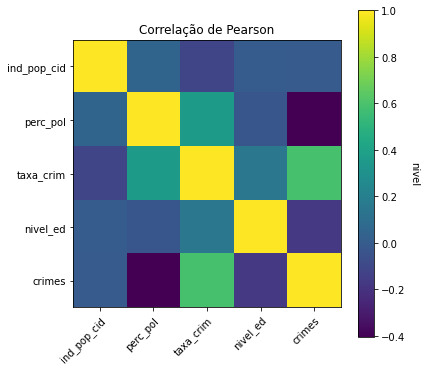

In [13]:
import matplotlib.pyplot as plt

corrs = df1[['ind_pop_cid','perc_pol','taxa_crim','nivel_ed','crimes']].corr().values
corrs
fig, ax = plt.subplots(figsize = [6,6])
# Filtrando apenas algumas colunas:
columns = ['ind_pop_cid','perc_pol','taxa_crim','nivel_ed','crimes']

#Cria a imagem da matriz de correalções
im = ax.imshow(corrs)
#---- Até aqui já teriamos a visualização desejada, mas podemos customizar ainda mais:
# Vamos colocar os nomes das colunas no eixo x e y:

ax.set_xticks(np.arange(len(columns))) #define númeto de itens no eixo
ax.set_yticks(np.arange(len(columns)))

ax.set_xticklabels(columns) # nomeia os itens do eixo
ax.set_yticklabels(columns)

# Rotacionamos os nomes das colunas para não ficar um nome sobre o outro
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Título do gráfico
ax.set_title("Correlação de Pearson")

# Criando a barrinha ao lado para legenda das cores:
cbar = ax.figure.colorbar(im, ax=ax) # im - cores, ax - itens do eixo
cbar.ax.set_ylabel('nivel', rotation=-90, va="bottom") # label para a barra
plt.show()

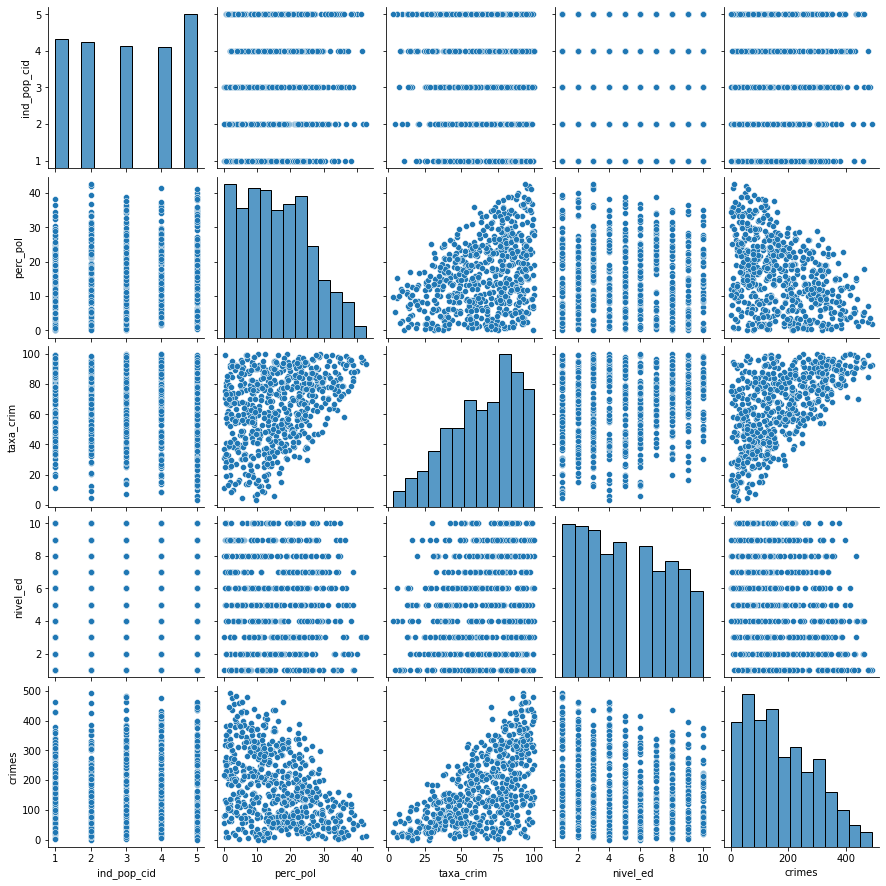

In [14]:
import seaborn as sns
sns.pairplot(df1)

In [15]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [16]:
X = df1['crimes'].values.reshape(-1,1)
y = df1['taxa_crim'].values

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X, y)
print("RMSE do KNN com 5 vizinhos: ", RMSE(y = y, y_pred = knn.predict(X)))

RMSE do KNN com 5 vizinhos:  17.29681287451826


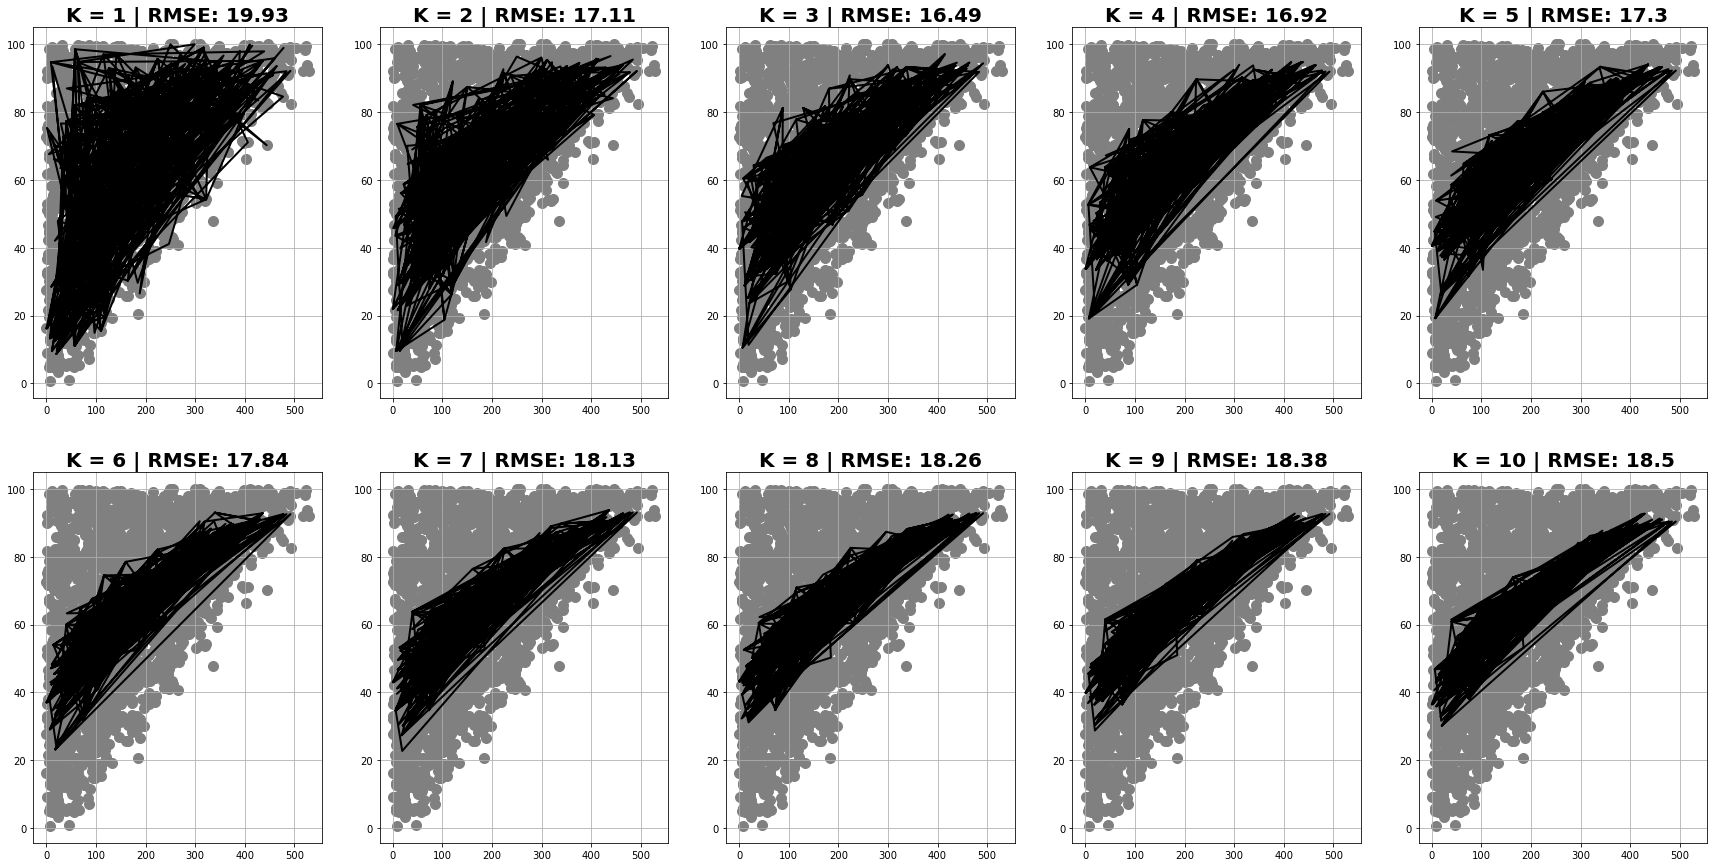

In [18]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['crimes'], df['taxa_crim'], s = 100, c = 'gray')
    plt.grid()

plt.show()

# KNN de 1 vizinho parece ser o melhor

In [19]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [20]:
X = df1['crimes'].values.reshape(-1,1)
y = df1['taxa_crim'].values
Xnovo = df2['crimes'].values.reshape(-1,1)
ynovo = df2['taxa_crim'].values

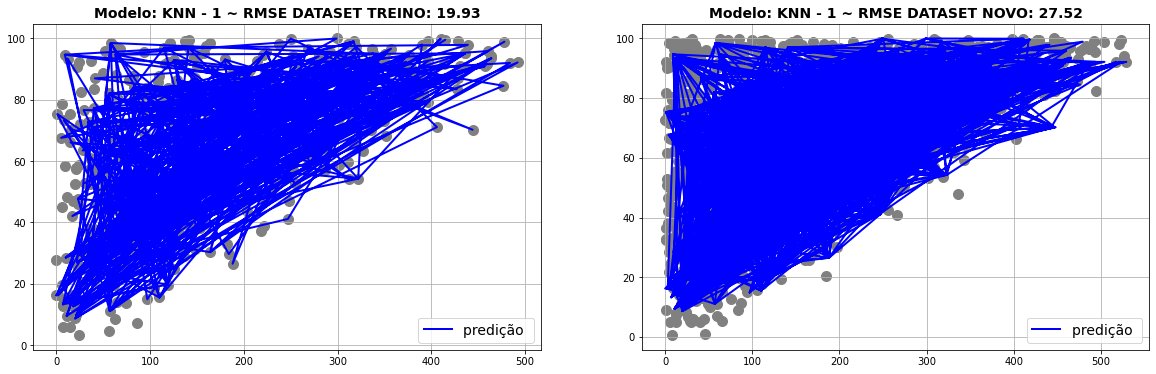

In [21]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

# KNN de 1 vizinho está sofendo de overfiting

Ex 2 parte 2
(Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultado)

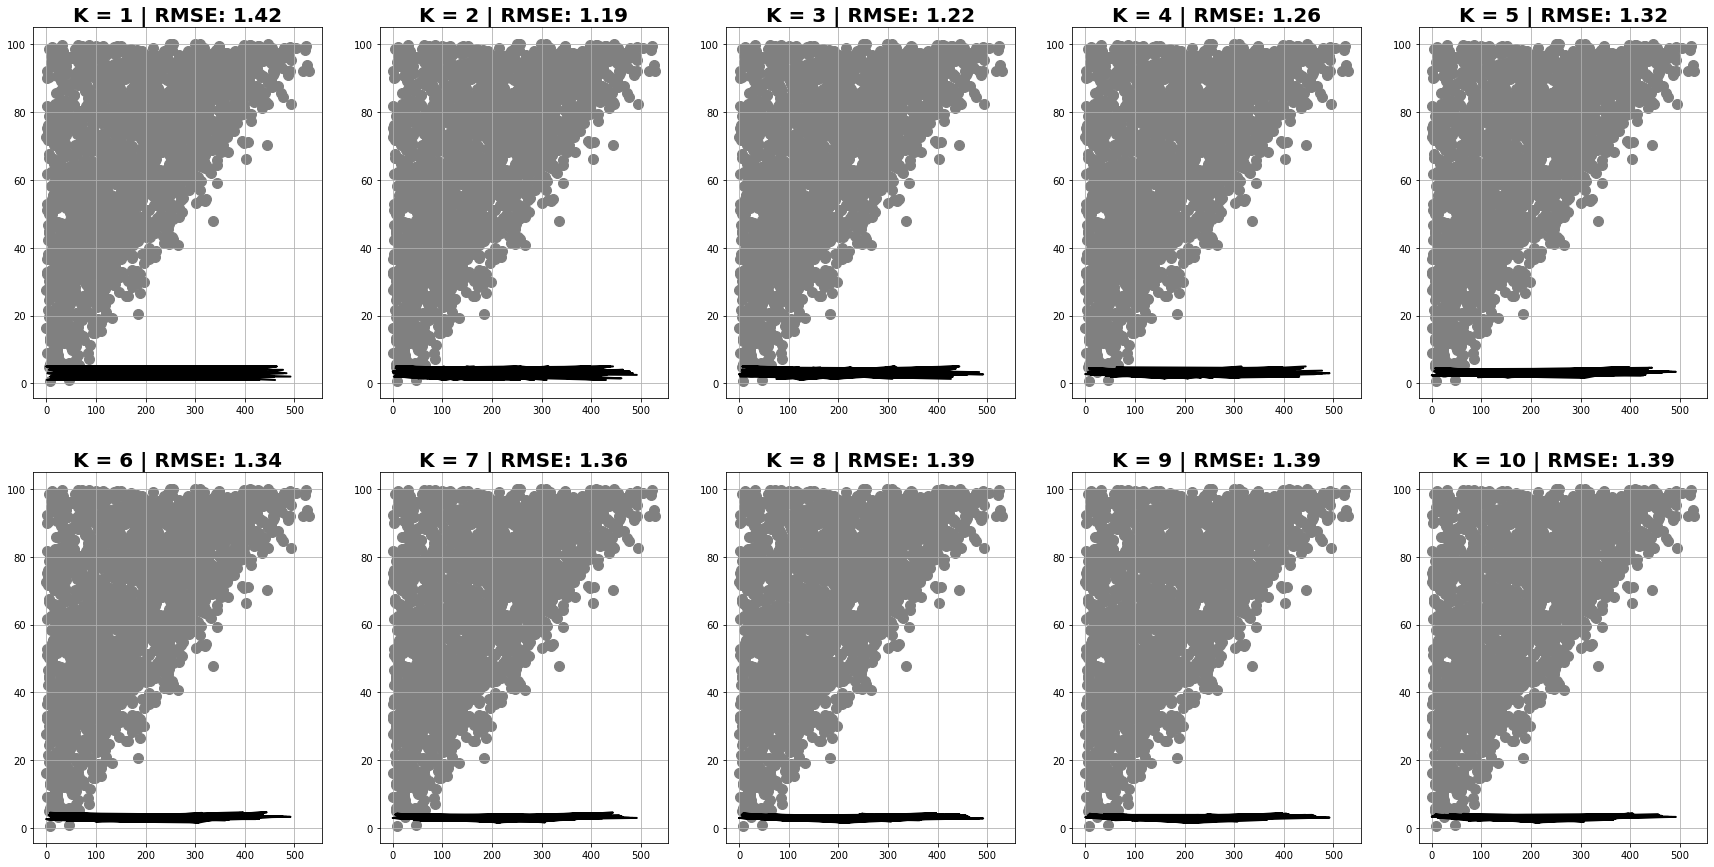

In [22]:
X = df1['crimes'].values.reshape(-1,1)
y = df1['ind_pop_cid'].values
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['crimes'], df['taxa_crim'], s = 100, c = 'gray')
    plt.grid()

plt.show()

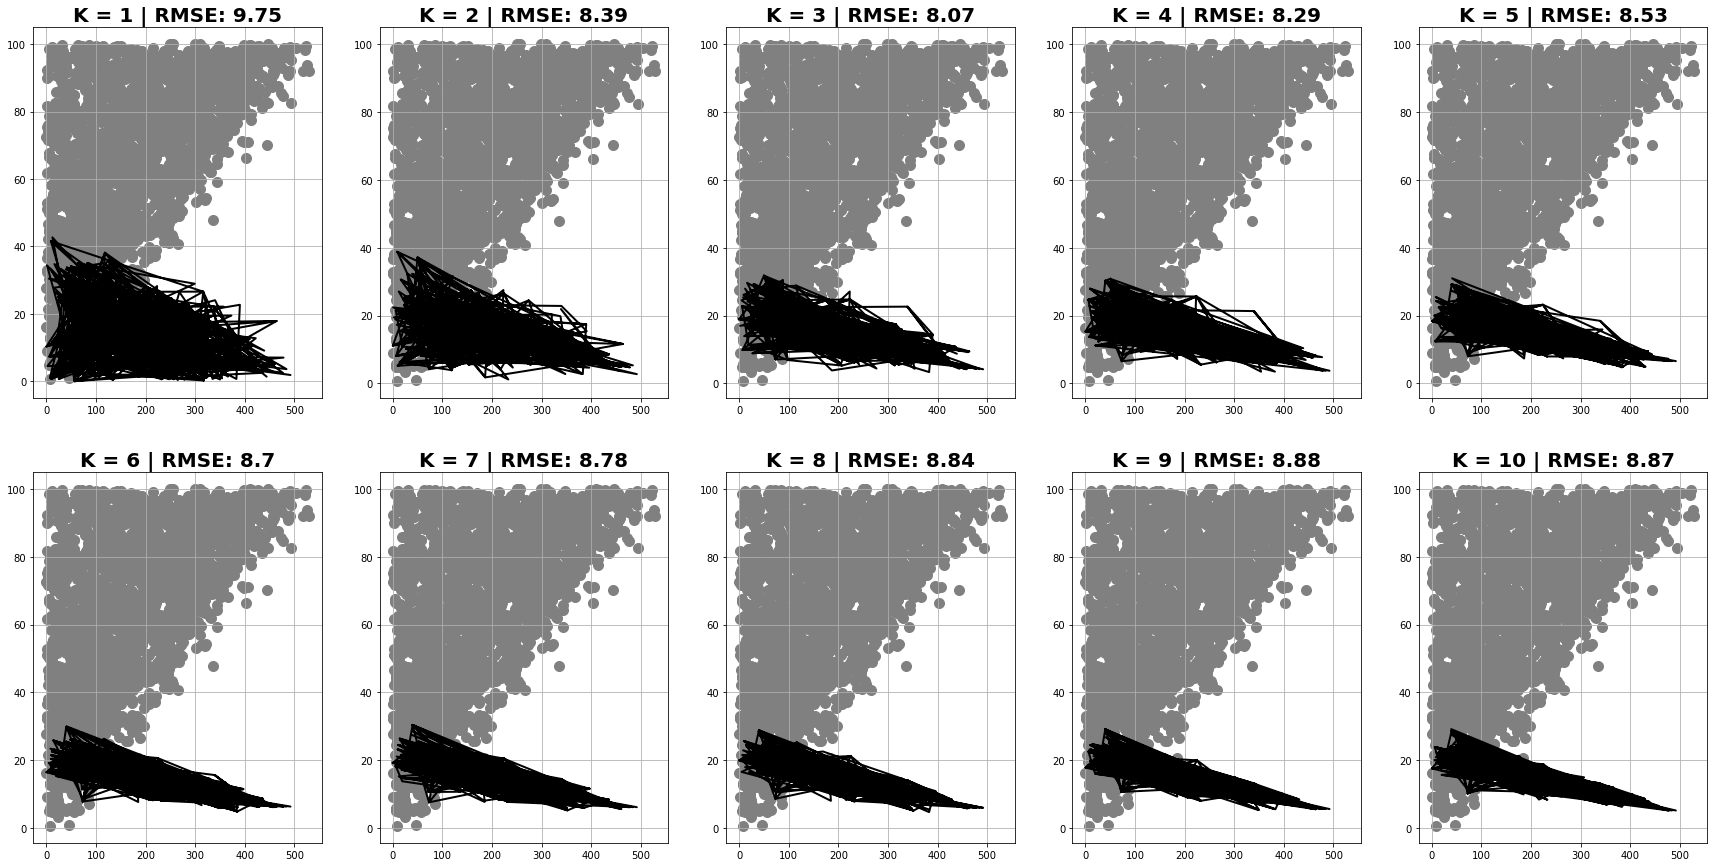

In [23]:
X = df1['crimes'].values.reshape(-1,1)
y = df1['perc_pol'].values
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['crimes'], df['taxa_crim'], s = 100, c = 'gray')
    plt.grid()

plt.show()

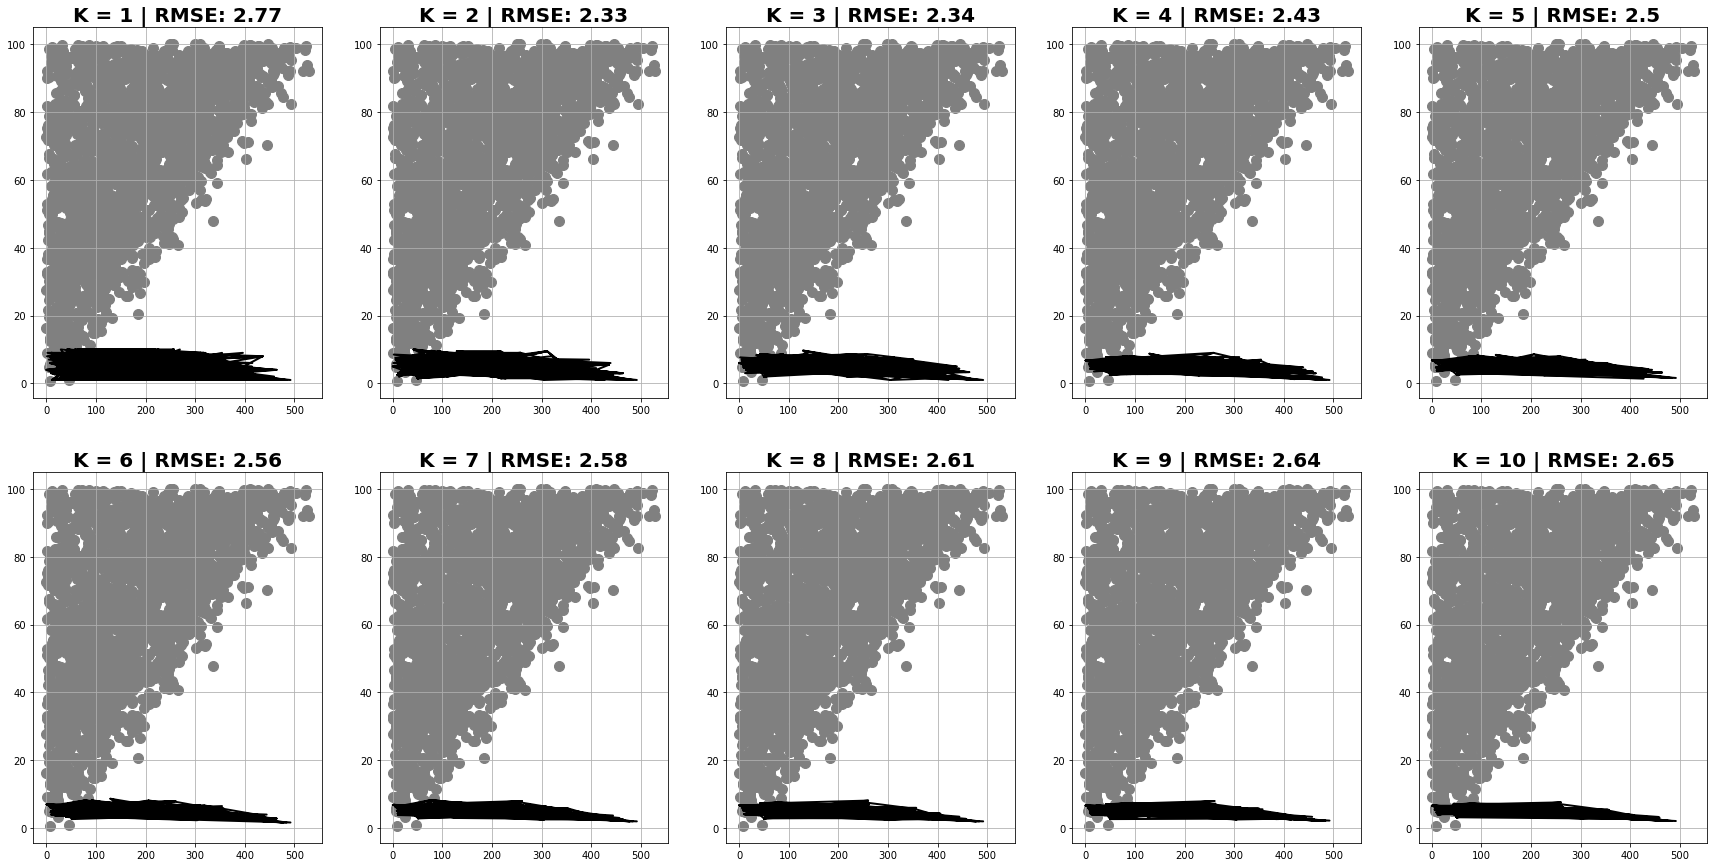

In [24]:
X = df1['crimes'].values.reshape(-1,1)
y = df1['nivel_ed'].values
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(X)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(X, knn.predict(X), c = 'black', lw = 2)
    plt.scatter(df['crimes'], df['taxa_crim'], s = 100, c = 'gray')
    plt.grid()

plt.show()

# Todos me parecem estar sofrendo underfiting